In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load dataset (make sure diabetes_100.csv is in same folder)
df = pd.read_csv('diabetes_100.csv')
print("Dataset loaded successfully!")
print(df.head())



Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       63             98             33      881  31.0   
1            3      144             41             33      837  34.1   
2           12       97             41             27      834  48.0   
3           14       64             93             36      670  28.5   
4           10       89             40             34      283  48.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                      1.89   55        0  
1                      1.50   77        1  
2                      2.41   51        1  
3                      1.00   55        0  
4                      0.79   67        0  


In [3]:
# Step 3: Separate dependent and independent variables
X = df.drop('Outcome', axis=1)  # Independent features
y = df['Outcome']               # Dependent target variable



In [4]:
# Step 4: Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [5]:

# Step 5: Build Decision Tree Model
# Using Entropy criterion (for Information Gain)
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [6]:
# Step 6: Predict using test data
y_pred = model.predict(X_test)



In [7]:
# Step 7: Evaluate model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))



✅ Model Accuracy: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        12
           1       0.43      0.46      0.44        13

    accuracy                           0.40        25
   macro avg       0.40      0.40      0.40        25
weighted avg       0.40      0.40      0.40        25



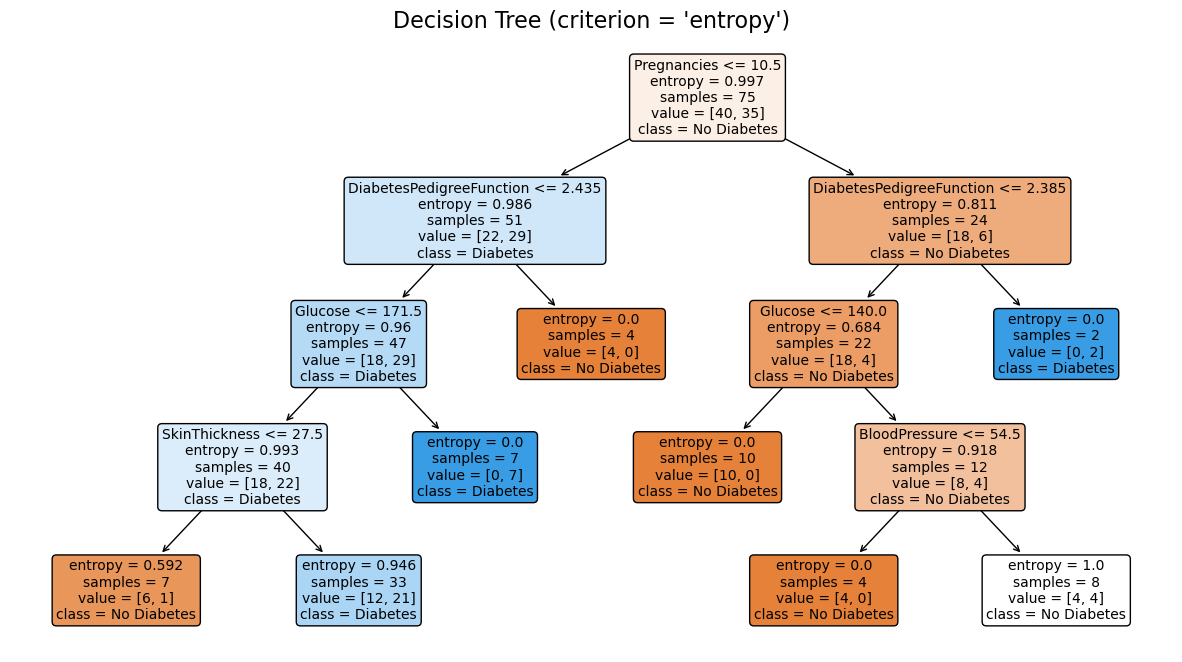


Feature Importances (higher means more impact on decision):
DiabetesPedigreeFunction    0.305658
Glucose                     0.300657
Pregnancies                 0.158670
SkinThickness               0.138884
BloodPressure               0.096131
Insulin                     0.000000
BMI                         0.000000
Age                         0.000000
dtype: float64


In [11]:
# Step 8: Visualize Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(
    model,
    feature_names=X.columns.tolist(),   # ✅ convert Index to list
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (criterion = 'entropy')", fontsize=16)
plt.show()

# Step 9: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importances (higher means more impact on decision):")
print(importances.sort_values(ascending=False))



Step 10: Entropy, Information Gain, and Gini Explanation

In [12]:
import math
import numpy as np

# Entropy formula
def entropy(y):
    classes = y.value_counts(normalize=True)
    return -sum(p * math.log2(p) for p in classes if p > 0)

# Parent entropy
parent_entropy = entropy(y_train)
print(f"Parent Entropy: {parent_entropy:.4f}")

# Example: Calculate for one feature (Glucose)
threshold = X_train['Glucose'].median()

left_split = y_train[X_train['Glucose'] <= threshold]
right_split = y_train[X_train['Glucose'] > threshold]

# Entropy after split
left_entropy = entropy(left_split)
right_entropy = entropy(right_split)

# Weighted average entropy of children
weighted_entropy = (len(left_split)/len(y_train)) * left_entropy + (len(right_split)/len(y_train)) * right_entropy

# Information Gain
info_gain = parent_entropy - weighted_entropy

print(f"Glucose threshold: {threshold}")
print(f"Left Entropy: {left_entropy:.4f}, Right Entropy: {right_entropy:.4f}")
print(f"Information Gain (Glucose): {info_gain:.4f}")


Parent Entropy: 0.9968
Glucose threshold: 120.0
Left Entropy: 0.9995, Right Entropy: 0.9911
Information Gain (Glucose): 0.0013
